# Which variable has the greasest correlation and causal link with a student's exam score?
### Goal: Plot control variables against outcome variable, as well peform statistical testing techniques to determine correlation and causal link significance between the control variables (hours studied, hours slept, class attendance percent, previous exam score).

In [1]:
import pandas as pd # data handling
import numpy as np # numerical operations
import matplotlib.pyplot as plt # data visualisation
from scipy import stats # Pearson correlation function
import statsmodels.api as sm # OLS model (low-level API)
import statsmodels.formula.api as smf # OLS model (formula API)
%matplotlib inline

## Intial Data Exploration: Wrangling and Cleaning

In [2]:
exams = pd.read_csv('student_exam_scores.csv')
exams

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [3]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


Not much data tidying needed here, as this is a fairly simple dataframe with no missing values. However, for the sake of consistency, it has been deemed necessary to have `exam_score` in the same format as `previous_scores`, as the former is of data type integer, whereas the latter of type float.

In [4]:
exams['exam_score'] = exams['exam_score'].round().astype(int)
# .round() needed as otherwise the values would be rounded down each time rather than their nearest integer

In [5]:
exams

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30
1,S002,1.3,8.6,60.7,55,25
2,S003,4.0,8.2,73.7,86,36
3,S004,3.5,4.8,95.1,66,34
4,S005,9.1,6.4,89.8,71,40
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,43
196,S197,7.1,6.1,85.1,92,40
197,S198,1.6,6.9,63.8,76,28
198,S199,12.0,7.3,50.5,58,42


In [6]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB


## Scatter plots to visualise correlation

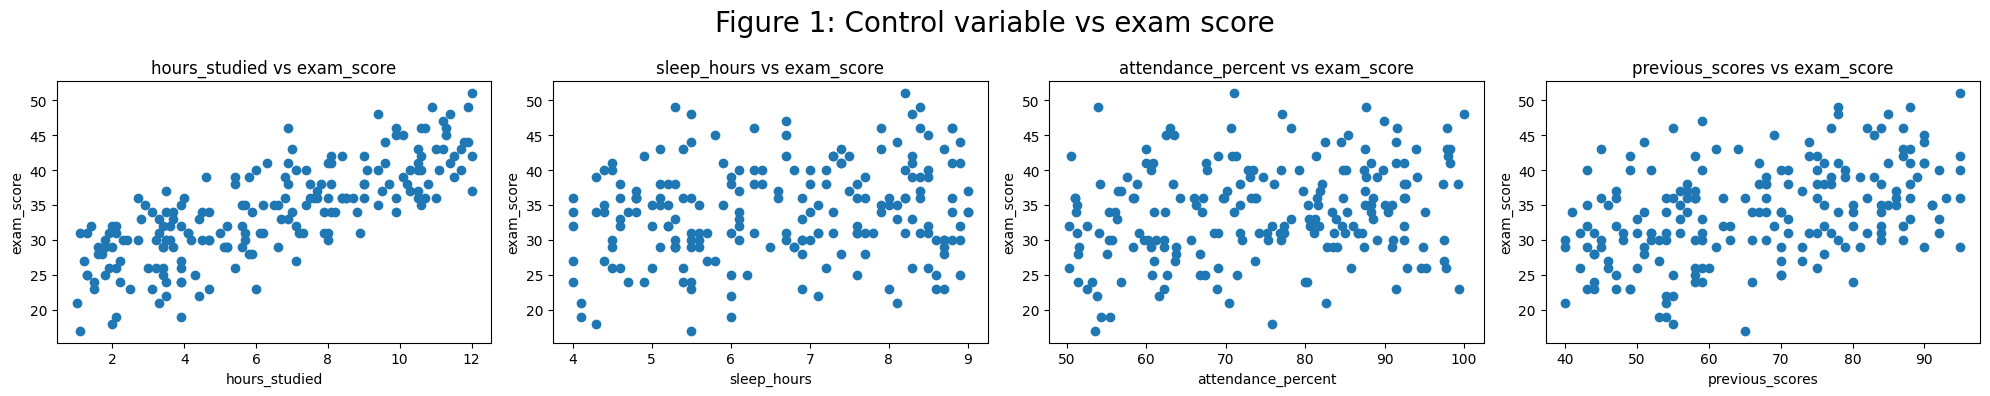

In [13]:
control_variables = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']
outcome_variable = 'exam_score'
num_vars = len(control_variables)
fig, axes = plt.subplots(1, num_vars, figsize=(5*num_vars, 4))
plt.suptitle('Figure 1: Control variable vs exam score', fontsize=20)
for ax, cv in zip(axes, control_variables):
    ax.scatter(exams[cv], exams[outcome_variable])
    ax.set_xlabel(cv)
    ax.set_ylabel(outcome_variable)
    ax.set_title(f'{cv} vs {outcome_variable}')
plt.tight_layout()
plt.show()

Just by looking, it's clear to see that `hours_studied` is the only variable to have a significant correlation with `exam_score`, visually speaking. To confirm our suspicions, we will run multiple Pearson Correlation Analyses on each control variable against `exam_score` to compute which one has the strongest and most significant correlation.

## Pearson Correlation statistical significance test

In [8]:
data = exams.copy()
corr_results = []
for cv in control_variables:
    try:
        r, p = stats.pearsonr(data[cv].values, data[outcome_variable].values)
    except Exception as e:
        r, p = np.nan, np.nan
    corr_results.append({
        'variable': cv,
        'pearson_r': r,
        'abs_r': abs(r),
        'pearson_pvalue': p,
        'Statistically significant?': p < 0.05
    })
corr_df = pd.DataFrame(corr_results)

corr_df = corr_df.sort_values('abs_r', ascending=False).reset_index(drop=True)
print("--- Pairwise Pearson correlations (control variable vs outcome (exam_score)) ---")
corr_df

--- Pairwise Pearson correlations (control variable vs outcome (exam_score)) ---


,variable,pearson_r,abs_r,pearson_pvalue,Statistically significant?
0,hours_studied,0.777604,0.777604,9.123710e-42,True
1,previous_scores,0.429550,0.429550,2.193865e-10,True
2,attendance_percent,0.223812,0.223812,1.443301e-03,True
3,sleep_hours,0.188608,0.188608,7.480595e-03,True


It would appear that indeed actually all control variables are have a statistically significant positive correlation with `exam_score`, but `hours_studied` has by far the most significant link, as expected from our visual observations. `hours_studied` also has by far the strongest correlation, with an `r` value of about `0.78`, compared to `sleep_hours` (the weakest correlation) with just `r ~ 0.19`. However, as the saying goes, **Correlation does not imply causation**. Which is why, a Simple Linear Regression model will also be fitted to the variables to test for causal evidence between the control variable and `exam_score`.

## Simple Linear Regression model for causal inference

In [9]:
reg_results = []
for cv in control_variables:
    formula = f'{outcome_variable} ~ {cv}'
    model = smf.ols(formula=formula, data=data).fit()
    
    coef = model.params.get(cv, np.nan)
    stderr = model.bse.get(cv, np.nan)
    tvalue = model.tvalues.get(cv, np.nan)
    pvalue = model.pvalues.get(cv, np.nan)
    conf_int_low, conf_int_high = model.conf_int().loc[cv]
    
    # Compute standardised coefficient (beta): Z-normalise control and outcome variables and then fit OLS again
    # Standardising gives coefficients that are on the same scale and makes effect sizes comparable.
    x_z = (data[cv] - data[cv].mean())/data[cv].std(ddof=0)
    y_z = (data[outcome_variable] - data[outcome_variable].mean())/data[outcome_variable].std(ddof=0)
    X_z = sm.add_constant(x_z) # Add constant when using low-level API

    model_z = sm.OLS(y_z, X_z).fit()
    standardised_beta = model_z.params[1] if len(model_z.params) > 1 else np.nan

    reg_results.append({
        'variable': cv,
        'coef_unstd': coef, # unstandardised regression coefficeint
        'standardised_beta': standardised_beta, # standardised regression coefficient
        'p_value': pvalue, # significance threshold ( < 0.05)
        'Statistically significant?': pvalue < 0.05,
        'std_err': stderr, # standard error of coefficient
        't_value': tvalue, # test statistic (higher abs(t) = stronger evidence that control affects outcome)
        'conf_low': conf_int_low, # 95% confidence interval lower bound
        'conf_high': conf_int_high, # 95% confidence interval upper bound
        'r_squared': model.rsquared, # proportion of outcome variable variation explained by control (higher = better fit)
    })
reg_df = pd.DataFrame(reg_results)
reg_df = reg_df.sort_values(['p_value', 'standardised_beta'], ascending=[True, False]).reset_index(drop=True)

print("\n--- Simple OLS regression results (each control individually predicting outcome (exam_score)) ---")
reg_df[['variable','coef_unstd','standardised_beta','std_err','t_value','p_value','r_squared', 'Statistically significant?']]


--- Simple OLS regression results (each control individually predicting outcome (exam_score)) ---


C:\Users\sammy\AppData\Local\Temp\ipykernel_21852\2800328692.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  standardised_beta = model_z.params[1] if len(model_z.params) > 1 else np.nan
C:\Users\sammy\AppData\Local\Temp\ipykernel_21852\2800328692.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  standardised_beta = model_z.params[1] if len(model_z.params) > 1 else np.nan
C:\Users\sammy\AppData\Local\Temp\ipykernel_21852\2800328692.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

,variable,coef_unstd,standardised_beta,std_err,t_value,p_value,r_squared,Statistically significant?
0,hours_studied,1.640097,0.777604,0.094245,17.402424,9.123710e-42,0.604668,True
1,previous_scores,0.186667,0.429550,0.027889,6.693258,2.193865e-10,0.184513,True
2,attendance_percent,0.106911,0.223812,0.033086,3.231280,1.443301e-03,0.050092,True
3,sleep_hours,0.857536,0.188608,0.317317,2.702459,7.480595e-03,0.035573,True


Looking at the above table reveals some interesting conclusions. For example, not only were all control variables significantly correlated to `exam_score`, but they are all significantly causally linked to it too. Each control variable shares the exact same `p_value` between the Simple Linear Regression model and the Pearson Correlation test, as well as the same correlation/causality strength coefficient (`abs_r` and `standardised_beta` respectively). This model also highlights the importance of normalising data as, without it, it would have been implied that `sleep_hours` has the second strongest causal link coefficient with `exam_score` (`coef_unstd ~ 0.86`), when in actuality it has the weakest, as shown by its `standardised_beta` and `std_err` value being the smallest (`~ 0.19`) and largest (`~ 0.32`) respectively. Whilst the majority of the evidence from the above table points to `hours_studied` have the strongest and most significant causal link with `exam_score` (with it having the highest `standardised_beta`, `t_value`, and `r_squared` value, as well as the smallest `p_value`), it has the second largest standard error `std_err` value of `~ 0.094`, meaning that its `coef_unstd` (and so in turn its `standardised_beta` value too) was estimated with second least amount of precision out of all the control variables.

## Summary and Final Conclusion

In [10]:
most_correlated = corr_df.loc[0, 'variable']
most_correlated_r = corr_df.loc[0, 'pearson_r']
most_significant_reg = reg_df.loc[0, 'variable']
most_significant_p = reg_df.loc[0, 'p_value']

corr_df.to_csv('correlation_summary.csv', index=False)
reg_df.to_csv('regression_summary.csv', index=False)

print(f"\nMost strongly correlated variable (by |r|): {most_correlated} (r = {most_correlated_r:.4f})")
print(f"Most statistically significant simple regression predictor (by p-value): {most_significant_reg} (p = {most_significant_p:.4g})")


Most strongly correlated variable (by |r|): hours_studied (r = 0.7776)
Most statistically significant simple regression predictor (by p-value): hours_studied (p = 9.124e-42)


#### As seen from the results, whilst all control variables have a positive and significant correlation and causal link with `exam_score`, `hours_studied` is by far the strongest predictor. It has highest `abs_r` or `standardised_beta` value, meaning it has the biggest effect on `exam_score`, the highest `r_squared`, meaning it accounts for the highest variance in `exam_score` (about 60%) out of all the control variables, and the lowest `p_value`, meaning it has the most significant and reliable relationship with `exam_score`. 
#### In summary, `hours_studied` contributes more than all the other control variables combined. It is important to note however though that the other control variables, particulary `previous_scores` also has a strong and significant correlation/causal relationship with `exam_score`, however they are clearly just secondary influences compared to `hours_studied`.